<a href="https://colab.research.google.com/github/Jaslyn10/Vane_Capital_Case/blob/main/Vane_Capital_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE VANE CAPITAL CASE

## Case Description

CEO: Alexander Vane \
Age: 54 \
Net worth: Estimated 450 million\
Company: Vane Capital\
Company type: Investment Firm\
Date of Death: 15 Nov 2024

Features of the CEO:
* Aggressive takeover tactics
* volatile management style
* made lot of enemies among competitors, former employees, estranged family members

Body found: In the server room of company's headquarters in Nottingham

Cause of death: Blunt force trauma

Features:
* Security system compromised
   => no CCTV footage
* 500 individual suspects
(employees, business rivals, personal acquaintances)

What we have?
* metadata
* communication logs

##GOAL
Filter the noise and find the most likely culprits.




# Stage 1
## Initial Datasets

**File 1**: suspects.csv
*   Content: List of suspects
*    their anthropometric data from their medical files

**Anthropometric data**: It is the data of human body shape, size and composition etc. often used in forensics, medical field, or optimising products for human comfort.

### Features

*   suspect_id(Primary Key)
*   name
* occupation
* nationality
* height_cm
* weight_kg

**File 2**: transactions.csv
* Content: Bank records(Obtained via varrant)

### Features
* transaction_id: unique id for the financial transfer
* suspect_id(Foreign key) Links to the suspect List
* date: The date the transaction was processed
* amount: Value of transaction in GBP(£)
* category: Transaction type(eg. dining, retail, transfer)
* recipient: The entity who received the funds


## Goal 1

Create a DataFrame containing suspect profile details alongwith their total spending and transaction count



## Task 1: Data Acquisition and inspection

In [229]:
import pandas as pd
import numpy as np

In [230]:
df_suspects = pd.read_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/suspects.csv")
df_transactions = pd.read_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/transactions.csv")

Inspecting first few rows of each dataset

In [231]:
df_suspects.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165,52.0
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188,90.0
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154,94.0
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178,96.0


In [232]:
df_transactions.head()

,transaction_id,suspect_id,date,amount,category,recipient
0,8640,188,15/10/2024 16:10,1.000000e+35,Retail,Mills PLC
1,3472,52,05/11/2024 23:42,4.970881e+04,Large Purchase,Investment Fund
2,19226,480,30/10/2024 14:39,4.813641e+04,Large Purchase,Investment Fund
3,15203,368,13/11/2024 01:26,4.631116e+04,Large Purchase,Investment Fund
4,4557,80,23/09/2024 06:49,4.260340e+04,Large Purchase,Investment Fund


Inspecting the data types of each dataset

In [233]:
df_suspects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suspect_id   500 non-null    int64  
 1   name         500 non-null    object 
 2   occupation   500 non-null    object 
 3   nationality  500 non-null    object 
 4   age          496 non-null    float64
 5   height_cm    499 non-null    object 
 6   weight_kg    498 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


**Observation for suspect.csv dataset**
*   **height_cm** feature is **stored as string** instead of float or int
*   There are some **missing values** in columns **age(4), height_cm(1) and weight_kg(2)**



In [234]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  18508 non-null  int64  
 1   suspect_id      18508 non-null  int64  
 2   date            18508 non-null  object 
 3   amount          18508 non-null  float64
 4   category        18501 non-null  object 
 5   recipient       18508 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 867.7+ KB


**Observation for transactions.csv dataset**
*   **date** feature is **stored as a string** instead of a datetime object
* The **category** column seems to have **7 missing values**.



In [235]:
df_suspects.describe(include="all")

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg
count,500.000000,500,500,500,496.000000,499,498.000000
unique,NaN,500,343,213,NaN,55,NaN
top,NaN,Arthur Fletcher,"Scientist, biomedical",Vietnam,NaN,154,NaN
freq,NaN,1,5,11,NaN,17,NaN
mean,250.500000,NaN,NaN,NaN,52.421371,NaN,74.419679
std,144.481833,NaN,NaN,NaN,182.727312,NaN,14.435264
min,1.000000,NaN,NaN,NaN,18.000000,NaN,50.000000
25%,125.750000,NaN,NaN,NaN,32.000000,NaN,61.000000
50%,250.500000,NaN,NaN,NaN,45.000000,NaN,75.000000
75%,375.250000,NaN,NaN,NaN,57.000000,NaN,86.000000


**Observation of suspects dataset**\
In column **Age** the max and min values do not lie within the IQR Range indicating presence of outliers.

*   Age maximum value: 4100 which is unrealistic
* The IQR Range for this column is -5.5 to 94.5. Any value outside this range is a potential outlier.
* While minimum value 18 lies well within this range, the maximum value 4100 clearly lies outside this range indicating presence of potential **Outliers** within the **Age** column.

The IQR of column **weight_kg** is 23.5 to 123.5 and the minimum and maximum values 50 and 99 lie well within this range.


In [236]:
df_transactions.describe(include="all")

,transaction_id,suspect_id,date,amount,category,recipient
count,18508.00000,18508.000000,18508,1.850800e+04,18501,18508
unique,NaN,NaN,16592,NaN,8,14116
top,NaN,NaN,15/10/2024 20:25,NaN,Utilities,Smith Group
freq,NaN,NaN,4,NaN,3156,36
mean,10705.52896,245.919548,NaN,5.403069e+30,NaN,NaN
std,5342.89502,144.327672,NaN,7.350557e+32,NaN,NaN
min,1453.00000,1.000000,NaN,-1.000000e+16,NaN,NaN
25%,6078.75000,121.000000,NaN,6.663250e+01,NaN,NaN
50%,10705.50000,244.000000,NaN,1.274500e+02,NaN,NaN
75%,15332.25000,371.000000,NaN,1.903750e+02,NaN,NaN


In [237]:
Q1 = df_transactions['amount'].quantile(0.25)
Q3 = df_transactions['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(int(lower_bound)," - ",int(upper_bound))
print("Minimum value of column Amount:",int(df_transactions["amount"].min()))
print("Maximum value of column Amount:",int(df_transactions["amount"].max()))

-118  -  375
Minimum value of column Amount: -10000000000000000
Maximum value of column Amount: 99999999999999996863366107917975552


**Observations of Transactions dataset**

* Mean(5.4e+30) of the column **amount** is >> 50%(1.27e+02) indicating **right skew**.

* IQR range of **amount** column is **-118 to 375** while the minimum and maximum values **-1e+16 and 1e+35** are beyond this range indicating either **outliers or inconsistency in the transactions**.

* From the date column we see **maximum number of transactions** were done on **15th October 2024 at 8:25 pm** exactly 1 month before the CEO died.

* How is there **4 transactions** at the same time?

* Maximum transactions of about 36 were made with **Smith Group**.

**Plotting the boxplots of the numerical columns of both datasets for some visual analysis**

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

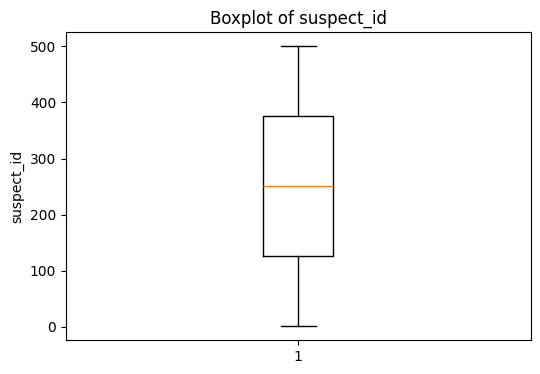

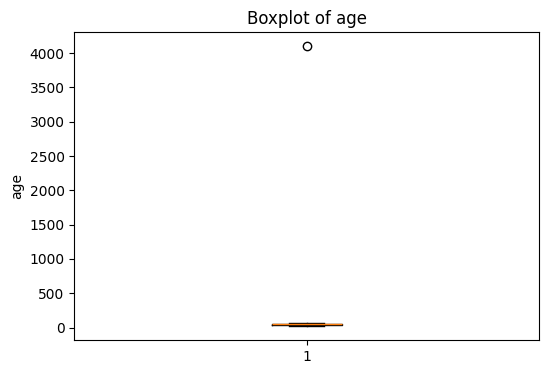

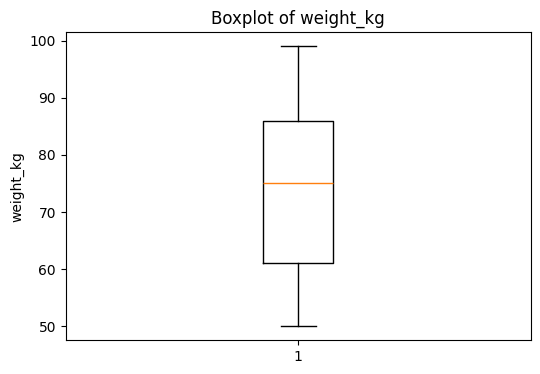

In [239]:
numeric_df_suspects = df_suspects.select_dtypes(include="number")
for col in numeric_df_suspects.columns:
  s = pd.to_numeric(numeric_df_suspects[col],errors ="coerce").dropna()   #Here we drop the nan values or else the plt won't work and will give blank plot
  plt.figure(figsize=(6,4))
  plt.boxplot(s)
  plt.ylabel(col)
  plt.title(f"Boxplot of {col}")
  plt.show()

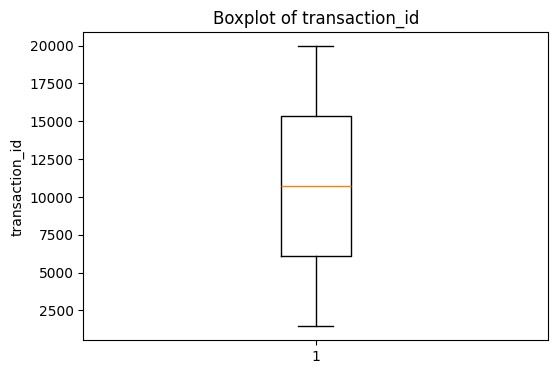

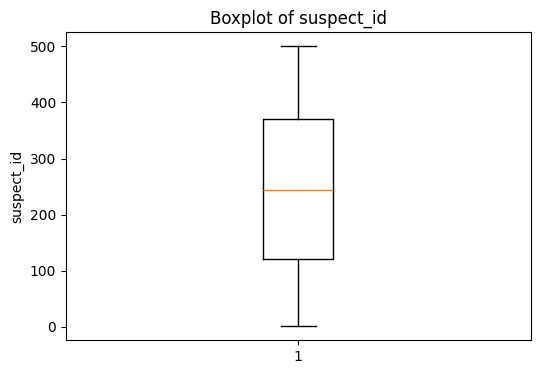

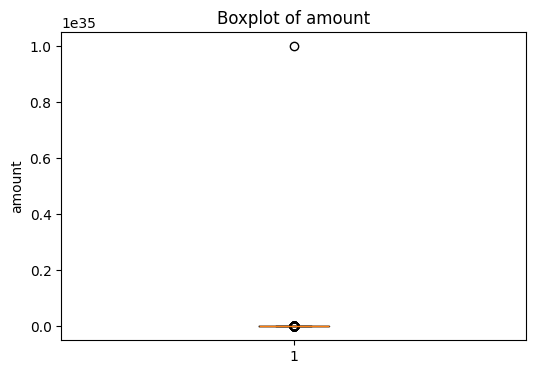

In [240]:
numeric_df = df_transactions.select_dtypes(include='number')
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numeric_df[col])
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show()


**Observation from the above plots**\
The above plots further confirm the presence of **outliers** in columns **age** and **amount** from tables **suspects** and **transactions** respectively.

## Task 2: Data Cleaning and Type Casting

### 1. Date conversion
Converting date column of transactions dataset from string to date data-type.

In [241]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

/tmp/ipython-input-3535503871.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transactions['date'] = pd.to_datetime(df_transactions['date'])


In [242]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  18508 non-null  int64         
 1   suspect_id      18508 non-null  int64         
 2   date            18508 non-null  datetime64[ns]
 3   amount          18508 non-null  float64       
 4   category        18501 non-null  object        
 5   recipient       18508 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 867.7+ KB


Converting height column of suspects dataset from string to float.

In [243]:
df_suspects['height_cm']=pd.to_numeric(df_suspects['height_cm'],errors ="coerce").dropna()

In [244]:
df_suspects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suspect_id   500 non-null    int64  
 1   name         500 non-null    object 
 2   occupation   500 non-null    object 
 3   nationality  500 non-null    object 
 4   age          496 non-null    float64
 5   height_cm    497 non-null    float64
 6   weight_kg    498 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.5+ KB


### 2. Missing Value Check on all tables:

In [245]:
df_suspects.isnull().sum()

,0
suspect_id,0
name,0
occupation,0
nationality,0
age,4
height_cm,3
weight_kg,2


In [246]:
df_transactions.isnull().sum()

,0
transaction_id,0
suspect_id,0
date,0
amount,0
category,7
recipient,0


**Observation**
* As observed before, here we get to reconfirm  that the features age(4), height(1) and weight(2) of Suspects dataset and the feature category(7) of transactions dataset have missing values.
* In total both the datasets have 7 missing values each.

**Summary of Data Inspection results**

1.   **Missing Values**: Age, height, weight (Suspects Dataset)
2.   **Missing Values**: category (Transactions Dataset)
3.   **Outliers**: Age (Suspects Dataset)
4.   **Outliers**: Amount (Transactions Dataset)
5.   **Type Conversion**: Date feature of Transactions dataset was converted from string data-type to date data-type.
6.   **Type Conversion**: height feature of Suspects dataset was converted from string data-type to float data-type.

**Other observations**

1.   From the date column we see maximum number of transactions were done on 15th October 2024 at 8:25 pm exactly 1 month before the CEO died.

2.   How is there 4 transactions at the same time?

3.   Maximum transactions of about 36 were made with Smith Group.



## Task 3: Feature Engineering
Summarising the raw transaction logs into meaningful features for each suspect.

### 1. Aggregation
Create a new dataFrame called **suspect_financials**
*   Group df_transactions by suspect id.
*   Calculate the **total spending**.
*   Calculate the **transaction count** (transaction id → count).
*   Rename the columns to **total_spent** and **num_transactions** for clarity.

In [247]:
suspect_financials = df_transactions.groupby("suspect_id").agg(total_spent=('amount','sum'),
                                                               num_transactions =('transaction_id','count')
).reset_index()

In [248]:
suspect_financials.head()

,suspect_id,total_spent,num_transactions
0,1,6494.72,53
1,2,4914.24,43
2,3,2887.32,24
3,4,32497.94,28
4,5,4355.72,30


## Task 4: Creating a Master Table

Creating a main dataset by joining the data from suspects and suspect_financials tables.

1. **Left Join**: Perform a pd.merge() between df suspects and suspect financials.
* **Key**: suspect id
* **How**: left (We want to keep all suspects, even if they have no transactions).
2. **Missing financials**: If any suspects have NaN for total spent (meaning they had no transactions), fill these values with 0.


In [249]:
df_master = pd.merge(df_suspects, suspect_financials, on = "suspect_id", how = "left")
df_master.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30


In [250]:
df_master.isna().sum()

,0
suspect_id,0
name,0
occupation,0
nationality,0
age,4
height_cm,3
weight_kg,2
total_spent,0
num_transactions,0


There are no missing values or NaN for total spent, so there is no need to apply any missing value logical imputation.

In [251]:
#df_master['total_spent','num_transactions']= df_master['total_spent','num_transactions'].fillna(0)

## Task 5: A first filter
**Tip-Off**\
Victim was known to only associate with individuals who were financially active.
1. **Filtering**: Filter your master DataFrame to include only suspects who have made **more than 20 transactions** in the recorded period.

2. **Result**: How many suspects remain in the pool after this filter?

###RESULT

The names of these remaining suspects. This reduced list will be the focus
of the next lab.

In [252]:
fil_df_master = df_master[df_master["num_transactions"]>20]
fil_df_master.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30


In [253]:
print(f"Remaining number of suspects from the filtered pool: {fil_df_master.shape[0]}")

Remaining number of suspects from the filtered pool: 431


## Names of the shortlisted Suspects

In [254]:
print(f"Name of the resultant suspects:")
fil_df_master['name']

Name of the resultant suspects:


,name
0,William Jennings
1,Lesley Wilson-Newman
2,Abdul Hopkins
3,Mrs Lauren Green
4,Tina Foster
5,Nigel Edwards
6,Abdul Burton-Patterson
7,Sarah Reed-Walsh
9,Dr Lee Green
10,Eleanor Baker


## Saving the Master File
Saved the resultant shortlisted suspect list to a **master_suspects.csv** file.

In [255]:
fil_df_master.to_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/master_suspects.csv",index=False)

# Stage 2

What was obtained so far?\
List of shortlisted suspects based on the tip-off that victim was known to associate only with individuals who were financially active.\
Hence, we obtain and print a list of suspect names who had more than 20 transactions.\
However, this simple list is not enough yet as we need to **Understand their motivation**.\
**Note**: In white-collar crime the motive is often money.

## Goal 2
Statistically profile the suspects to identify financial anomalies, unexplained debts or a sudden large transfer that coincides with the time of murder.

## Task 1: Setup

**Given Investigative Info**

*   Alexander Vane must have been a target of blackmail.
*   Killer might have paid a huge amount to Vane to buy his silence - **blackmail payer**
*   Killer killed Vane to remove his debt holder out of the picture - **desperate debtor**

**Goal**: Identify and Match suspects to either a **Blackmail Payer** or **Desperate debtor**.

In [256]:
df_transactions.head()

,transaction_id,suspect_id,date,amount,category,recipient
0,8640,188,2024-10-15 16:10:00,1.000000e+35,Retail,Mills PLC
1,3472,52,2024-11-05 23:42:00,4.970881e+04,Large Purchase,Investment Fund
2,19226,480,2024-10-30 14:39:00,4.813641e+04,Large Purchase,Investment Fund
3,15203,368,2024-11-13 01:26:00,4.631116e+04,Large Purchase,Investment Fund
4,4557,80,2024-09-23 06:49:00,4.260340e+04,Large Purchase,Investment Fund


### LOAD MASTER_SUSPECTS DATASET

In [257]:
master_suspects = pd.read_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/master_suspects.csv")

In [258]:
master_suspects.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30


## Task 2:  Establishing a baseline through descriptive statistics
We need to identify what is "Normal" before identifying what is "Abnormal".

1. **Summary Statistics**: What is the mean transaction value of the amount column of the transactions dataset? What is the maximum value?
2. **Distribution inspection**: Calculate **mean** and **median** of the total_spent column of the master_suspects dataset.

**Analysis**: \
If mean >> median what does it imply of the distribution of wealth among the suspects?

In [259]:
df_transactions['amount'].describe()

,amount
count,1.850800e+04
mean,5.403069e+30
std,7.350557e+32
min,-1.000000e+16
25%,6.663250e+01
50%,1.274500e+02
75%,1.903750e+02
max,1.000000e+35


In [260]:
int(df_transactions['amount'].mean())

5403068943159714513202083528704

**Observation Of Amount Column of the Transactions dataset**
1. Mean of amount column = 5.403 x 10^30
   Maximum Value: 1 x 10^35

The mean transaction value of the amount column of transactions dataset was found to be 5.403 x 10^30 while the maximum value was found to be 10^35.


In [261]:
master_suspects['total_spent'].mean()

np.float64(2.320185614849188e+32)

In [262]:
master_suspects['total_spent'].median()

5784.76

**Observation results from Distribution inspection**

*   The mean of the total_spent column of the masters_table dataset was significantly greater than the median the same feature.

ie.\
    mean = 2.3202 x 10^32\
    median = 5784.76
    => mean >> median

This implies the dataset is **Right Skewed**.\
Hence, we may(not neccessarily) need to apply **log/ power transform**. This helps to normalise the data and help improve statistical tests and model performance. (normalising is bringing all the values within same range)\
Due to some possible huge values(Possible Outliers) the mean is really higher than the median.


## Task 3:  Search for blackmail

**Goal**: Search for single massive transaction that deviates from standard behaviour.
1. Sort raw transactions dataset in descending order of amount column.
2. **Threshold application**: Filter transactions having **amount value > £2,000**.
3. **Investigate**: Looking at the recipient column for these **Large Transfers**.
*Do any look suspicious  (e.g., “Offshore”, “Secret”, or shell companies)?*
4. **Suspect Identification**: Obtain and store the suspect_id associated with these transactions in a list called **suspects_with_motive**.


In [263]:
df_sorted_transactions = df_transactions.sort_values('amount', ascending = False)
df_sorted_transactions.head()

,transaction_id,suspect_id,date,amount,category,recipient
0,8640,188,2024-10-15 16:10:00,1.000000e+35,Retail,Mills PLC
1,3472,52,2024-11-05 23:42:00,4.970881e+04,Large Purchase,Investment Fund
2,19226,480,2024-10-30 14:39:00,4.813641e+04,Large Purchase,Investment Fund
3,15203,368,2024-11-13 01:26:00,4.631116e+04,Large Purchase,Investment Fund
4,4557,80,2024-09-23 06:49:00,4.260340e+04,Large Purchase,Investment Fund


In [264]:
large_transfers = df_sorted_transactions[df_sorted_transactions['amount']>2000]
large_transfers.tail()

,transaction_id,suspect_id,date,amount,category,recipient
164,13422,253,2024-11-13 08:14:00,2886.31,Wire Transfer,Offshore Holdings Ltd
165,10261,253,2024-10-08 17:57:00,2835.53,Wire Transfer,Offshore Holdings Ltd
166,13775,253,2024-10-17 12:03:00,2829.08,Wire Transfer,Offshore Holdings Ltd
173,19279,481,2024-10-26 23:11:00,2499.08,Services,Edwards-Hancock
99,13012,309,2024-11-06 21:50:00,2405.91,Large Purchase,Hospital Bill


In [265]:
large_transfers['recipient'].unique()

array(['Mills PLC', 'Investment Fund', 'Car Dealership',
       'Home Renovation', 'Wedding Venue', 'University Tuition',
       'Hospital Bill', 'Offshore Holdings Ltd', 'Edwards-Hancock'],
      dtype=object)

In [266]:
large_transfers['recipient'].value_counts()

,count
recipient,
Hospital Bill,19
Wedding Venue,18
University Tuition,16
Home Renovation,16
Investment Fund,16
Car Dealership,14
Offshore Holdings Ltd,3
Mills PLC,1
Edwards-Hancock,1


Recipients/clients that received huge amounts of money were:
*   Mills PLC
*   Investment Renovation
*   Car Dealership
*   Home Renovation
*   Wedding Venue
*   University Tuition
*   Hospital Bill
*   Offshore Holdings Ltd
*   Edwards-Hancock



In [267]:
import re
suspicious_transfers = large_transfers[large_transfers['recipient'].str.contains("Offshore|PLC|Secret|Shell|LtD",flags=re.IGNORECASE, regex=True)]
pd.set_option('display.max_rows',None)
suspicious_transfers

,transaction_id,suspect_id,date,amount,category,recipient
0,8640,188,2024-10-15 16:10:00,1.000000e+35,Retail,Mills PLC
164,13422,253,2024-11-13 08:14:00,2.886310e+03,Wire Transfer,Offshore Holdings Ltd
165,10261,253,2024-10-08 17:57:00,2.835530e+03,Wire Transfer,Offshore Holdings Ltd
166,13775,253,2024-10-17 12:03:00,2.829080e+03,Wire Transfer,Offshore Holdings Ltd


**SUSPECTS WITH MOTIVE LIST**

In [268]:
suspects_with_motive = list(suspicious_transfers['suspect_id'].unique())
print("IDs Suspicious suspects who spent more than 2000 pounds:",suspects_with_motive)

IDs Suspicious suspects who spent more than 2000 pounds: [np.int64(188), np.int64(253)]


## Task 4: Search for spending patterns

**Goal**: Find suspects whose spending behavious is erratic(irregular, unpredictable)
1. **Pivot table creation**: Create a pivot table from transactions.
* Index: suspect id
* Columns: category
* Values: amount
* Aggfunc: sum

In [269]:
pivot_table = pd.pivot_table(df_transactions,
    index = 'suspect_id',
    columns = 'category',
    values = 'amount',
    aggfunc = 'sum'
)

In [270]:
pivot_table

category,Dining,Groceries,Large Purchase,Retail,Services,Transport,Utilities,Wire Transfer
suspect_id,,,,,,,,
1,456.51,1304.68,NaN,1.274330e+03,1725.58,1045.20,6.884200e+02,NaN
2,1134.43,1376.49,NaN,4.144700e+02,1046.77,646.17,2.959100e+02,NaN
3,429.72,419.25,NaN,7.917900e+02,515.40,649.72,8.144000e+01,NaN
4,660.61,414.72,29175.71,7.050000e+02,475.32,426.79,6.397900e+02,NaN
5,375.96,167.43,NaN,2.388500e+02,1955.03,1293.36,3.250900e+02,NaN
6,772.87,279.92,NaN,8.349400e+02,987.28,842.02,6.550400e+02,NaN
7,810.50,506.50,NaN,4.386100e+02,940.96,1617.76,5.492900e+02,NaN
8,655.40,1285.10,NaN,1.432630e+03,993.80,2110.64,8.847600e+02,NaN
9,321.49,603.04,NaN,9.684000e+01,135.14,157.70,7.039500e+02,NaN


### Visualising the erratic or unusual spending patterns using the pivot table

<Axes: >

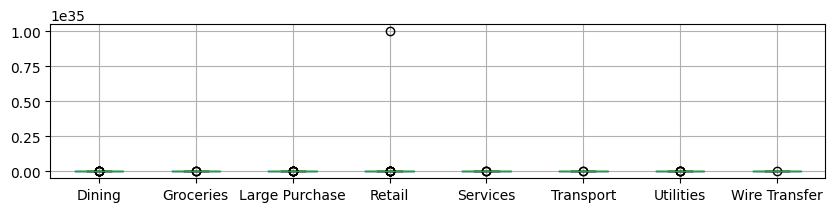

In [271]:
pivot_table.boxplot(figsize = (10,2))

In [272]:
outlier_list = []
pivot = pivot_table.fillna(0)
for column in pivot.columns:
  Q1 = pivot[column].quantile(0.25)
  Q3 = pivot[column].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5*IQR
  outlier = pivot[pivot[column]>upper_bound]
  for suspect_id, value in outlier[column].items():
    outlier_list.append({
        'suspect_id': suspect_id,
        'category': column,
        'amount': value
    })

outlier_df = pd.DataFrame(outlier_list)
outlier_df['category'].value_counts()

,count
category,
Large Purchase,91
Retail,10
Dining,7
Wire Transfer,7
Utilities,4
Groceries,3
Services,3
Transport,2


2. **Ratio analysis** (feature engineering):
* Assume a standard cost of living. Create a new column in the master suspects (or the
pivoted frame) called spending intensity.
* Calculate this as total spent / num transactions.
* Identify suspects with an abnormally high “Average Transaction Value” (e.g., over £100
per transaction on average).

In [273]:
master_suspects.columns

Index(['suspect_id', 'name', 'occupation', 'nationality', 'age', 'height_cm',
       'weight_kg', 'total_spent', 'num_transactions'],
      dtype='object')

In [274]:
master_suspects['spending_intensity']= master_suspects['total_spent']/master_suspects['num_transactions']
master_suspects.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions,spending_intensity
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53,122.541887
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43,114.284651
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24,120.305000
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28,1160.640714
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30,145.190667


**Suspects with abnormally high Average transaction Value**

In [275]:
master_suspects['spending_intensity'].describe()

,spending_intensity
count,4.310000e+02
mean,4.296640e+30
std,8.920056e+31
min,-4.761905e+14
25%,1.215622e+02
50%,1.307823e+02
75%,1.469740e+02
max,1.851852e+33


**EXTRACTING HIGH INTENSITY SPENDERS USING IQR OUTLIER DETECTION**

In [276]:
def outlier(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  UB = Q3 + 1.5*IQR
  outlier = df[df[column]>UB]
  return outlier



In [277]:
df_abnorm_HighAvgTrans = outlier(master_suspects,"spending_intensity")

3. **List addition**: Add these high-intensity spenders to the suspects with motive list (if they are not already present).

In [278]:
df_abnorm_HighAvgTrans.columns

Index(['suspect_id', 'name', 'occupation', 'nationality', 'age', 'height_cm',
       'weight_kg', 'total_spent', 'num_transactions', 'spending_intensity'],
      dtype='object')

In [279]:
suspects_with_motive += list(df_abnorm_HighAvgTrans['suspect_id'].unique())
suspects_with_motive = [int(x) for x in suspects_with_motive]
suspects_with_motive = list(set(suspects_with_motive))

## Task 5: A second filter
 Create a new dataframe motive suspects that contains only the suspects from the suspects with motive list.

How many suspects remain?

Save this filtered dataframe as motive suspects.csv.


In [285]:
motive_suspects = master_suspects[master_suspects['suspect_id'].isin(suspects_with_motive)]
#Note to self: Python int and NumPy integer types are fully compatible in comparisons.

In [293]:
len(suspects_with_motive) != motive_suspects.shape[0] #Confirming table creation with right number of rows

False

In [294]:
motive_suspects.to_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/motive_suspects.csv")